https://lorenabarba.com/blog/cfd-python-12-steps-to-navier-stokes/  
https://nbviewer.org/github/barbagroup/CFDPython/blob/master/lessons/14_Step_11.ipynb  

In [21]:
import numpy
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

In [22]:
nx = 101
ny = 101
nt = 500
nit = 50
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
x = numpy.linspace(0, 2, nx)
y = numpy.linspace(0, 2, ny)
X, Y = numpy.meshgrid(x, y)

rho = 1
nu = .02
dt = .001

u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx)) 
b = numpy.zeros((ny, nx))

In [23]:
def build_up_b(b, rho, dt, u, v, dx, dy):
    
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                     (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))

    return b

In [24]:
def pressure_poisson(p, dx, dy, b):
    pn = numpy.empty_like(p)
    pn = p.copy()
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[:, -1] = p[:, -2] # dp/dx = 0 at x = 2
        p[0, :] = p[1, :]   # dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]   # dp/dx = 0 at x = 0
        p[-1, :] = 0        # p = 0 at y = 2
        
    return p

In [25]:
def cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = numpy.empty_like(u)
    vn = numpy.empty_like(v)
    b = numpy.zeros((ny, nx))
    
    for n in range(nt):
        un = u.copy()
        vn = v.copy()
        
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                         un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                       (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                       (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))

        u[0, :]  = 1
        u[:, 0]  = 0
        u[-1, :] = 1
        u[:, -1] = 0    # set velocity on cavity lid equal to 1
        v[0, :]  = 0
        v[:, 0]  = 0
        v[-1, :] = 0
        v[:, -1] = 0
        
        u[25:45, 25:45]  = 0
        v[25:45, 25:45]  = 0
        
    return u, v, p

In [26]:
u = numpy.zeros((ny, nx))
v = numpy.zeros((ny, nx))
p = numpy.zeros((ny, nx))
b = numpy.zeros((ny, nx))
nt = 10
u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)
# pyplot.quiver(u[::4, ::4], v[::4, ::4], color='g') 

In [27]:
round(np.max(u), 2), round(np.min(u), 2), round(np.max(v), 2), round(np.min(v), 2), round(np.max(p), 2), round(np.min(p), 2), 

(1.0, -0.03, 0.1, -0.1, 2.55, -2.56)

In [28]:
def plot6(i):
    # Twice as tall as it is wide.
    fig = plt.figure(figsize=(60, 30))
    fig.suptitle('Velocity components and pressure of solve the Navier–Stokes equations in two dimensions', fontsize=50)
    fig.subplots_adjust(left=None, bottom=0.05, right=None, top=0.90, wspace=0.5, hspace=None)

    ax = fig.add_subplot(2, 3, 1)
    ax.contourf(X, Y, u, cmap=cm.bwr)
    ax.quiver(X[::5, ::5], Y[::5, ::5], u[::5, ::5], v[::5, ::5]) 
    ax.set_title('U', fontsize=50)

    ax = fig.add_subplot(2, 3, 2)
    ax.contourf(X, Y, p, alpha=0.5, cmap=cm.bwr)
    ax.streamplot(X, Y, u, v, linewidth=1, density=1.5, arrowsize=0.0)
    ax.set_title('P', fontsize=50)

    ax = fig.add_subplot(2, 3, 3)
    ax.contourf(X, Y, v, cmap=cm.bwr)
    ax.quiver(X[::5, ::5], Y[::5, ::5], u[::5, ::5], v[::5, ::5]) 
    ax.set_title('V', fontsize=50)

    ax = fig.add_subplot(2, 3, 5, projection='3d')
#     ax.set_zlim3d(-4, 4)
    surf = ax.plot_surface(X, Y, p, cmap=cm.bwr)
    
    ax = fig.add_subplot(2, 3, 4, projection='3d')
#     ax.set_zlim3d(-1, 1)
    surf = ax.plot_surface(X, Y, u, cmap=cm.bwr)

    ax = fig.add_subplot(2, 3, 6, projection='3d')
#     ax.set_zlim3d(-1, 1)
    surf = ax.plot_surface(X, Y, v, cmap=cm.bwr)

    plt.savefig('C:\\Users\\ksn\\temp/{:04d}.png'.format(i))
    plt.clf()


In [29]:
counter = 0
ii = 0

for i in range(1, 100):
    u, v, p = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)
    if np.log10(i) - counter < 1:
        counter = 0
        plot6(ii)
        ii += 1
    else:
        counter += 0.05 * np.log10(i)

<Figure size 4320x2160 with 0 Axes>

<Figure size 4320x2160 with 0 Axes>

<Figure size 4320x2160 with 0 Axes>

<Figure size 4320x2160 with 0 Axes>

<Figure size 4320x2160 with 0 Axes>

<Figure size 4320x2160 with 0 Axes>

<Figure size 4320x2160 with 0 Axes>

<Figure size 4320x2160 with 0 Axes>

<Figure size 4320x2160 with 0 Axes>

<Figure size 4320x2160 with 0 Axes>

<Figure size 4320x2160 with 0 Axes>

<Figure size 4320x2160 with 0 Axes>

<Figure size 4320x2160 with 0 Axes>

<Figure size 4320x2160 with 0 Axes>

<Figure size 4320x2160 with 0 Axes>

<Figure size 4320x2160 with 0 Axes>

<Figure size 4320x2160 with 0 Axes>

<Figure size 4320x2160 with 0 Axes>

<Figure size 4320x2160 with 0 Axes>

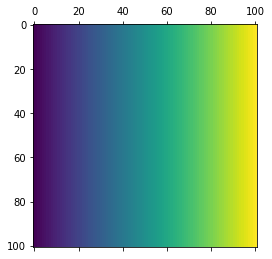

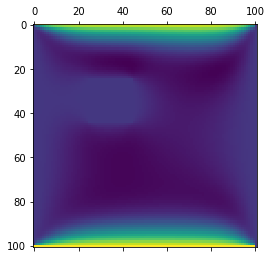

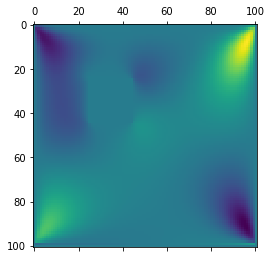

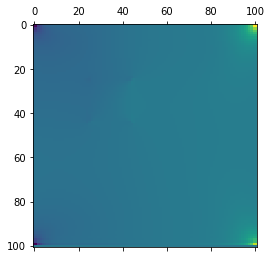

In [30]:
plt.matshow(X)
pyplot.matshow(u)
pyplot.matshow(v)
pyplot.matshow(p)